In [1]:
import numpy as np
import nengo
import nengo_spa as spa

In [2]:
D = 256

In [3]:
vocab = spa.vocab.Vocabulary(D)

In [4]:
vocab.populate('''DRIVE;MUSCLE;MOTOR;ACTUATOR;LEG;WHEEL;TWO;FOUR''')

In [5]:
list(vocab.keys())

['DRIVE', 'MUSCLE', 'MOTOR', 'ACTUATOR', 'LEG', 'WHEEL', 'TWO', 'FOUR']

In [6]:
vocab.populate('''PEDESTRIAN=DRIVE*MUSCLE+ACTUATOR*LEG*TWO''')

In [7]:
vocab.populate('''BICYCLE=DRIVE*MUSCLE+ACTUATOR*WHEEL*TWO''')

In [8]:
vocab.populate('''MOTORCYCLE=DRIVE*MOTOR+ACTUATOR*WHEEL*TWO''')

In [9]:
vocab.populate('''CAR=DRIVE*MOTOR+ACTUATOR*WHEEL*FOUR''')

In [10]:
list(vocab.keys())

['DRIVE',
 'MUSCLE',
 'MOTOR',
 'ACTUATOR',
 'LEG',
 'WHEEL',
 'TWO',
 'FOUR',
 'PEDESTRIAN',
 'BICYCLE',
 'MOTORCYCLE',
 'CAR']

In [31]:
l = ['PEDESTRIAN', 'BICYCLE', 'MOTORCYCLE', 'CAR']
sim = np.zeros((len(l), len(l)))
mask = np.zeros((len(l), len(l)))
for i,k in enumerate(l):
    for j, other_k in enumerate(l):
        sim[i,j] = np.abs(vocab[k].compare(vocab[other_k]))
        if j > i:
            mask[i,j] = True
        

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

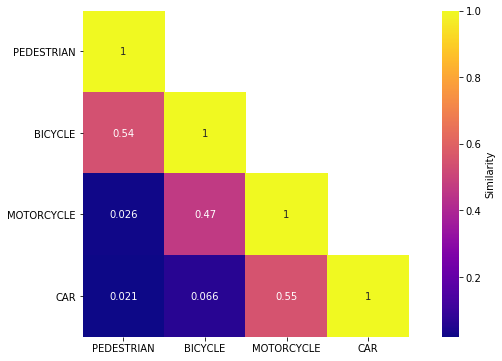

In [42]:
%matplotlib inline
fig = plt.figure(figsize=(12,6))
sns.heatmap(sim, annot=True, xticklabels=l, yticklabels=l, square=True, mask=mask, cmap=cm.plasma, cbar_kws={'label': 'Similarity'})
plt.yticks(rotation=0) 